In [1]:
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.signal
from scipy.optimize import curve_fit 
import math
from scipy import stats

numcores = multiprocessing.cpu_count()-3
numcores

def decode_rE(rE, a_ini=0, a_fin=360, N=512):
    #Population vector for a given rE
    # return ( angle in radians, absolut angle in radians, abs angle in degrees )
    N=len(rE)
    Angles = np.linspace(a_ini, a_fin, N) 
    angles=np.radians(Angles)
    rE = np.reshape(rE, (1,N))
    R = numpy.sum(np.dot(rE,exp(1j*angles)))/numpy.sum(rE)
    
    angle_decoded = np.degrees(np.angle(R))
    if angle_decoded<0:
        angle_decoded = 360+angle_decoded
    
    return angle_decoded
    #Mat.append(  [angle(R), abs(angle(R)) , degrees(abs(angle(R)))]  )
    #return round( np.degrees(abs(np.angle(R))), 2)



def closest(lst, K):       
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 
      


def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)


def most_frequent(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 


def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)
        interferences.append(Err_interference)
    
    return interferences


def viz_polymonial(X, y, poly_reg, pol_reg):
    plt.figure()
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Fit Bump')
    plt.xlabel('Neuron')
    plt.ylabel('rate')
    plt.show(block=False)
    return



def model_I0E(center_angle, size_windows, N=512):
    inf, sup = np.radians(center_angle) - np.radians(size_windows/2), np.radians(center_angle) + np.radians(size_windows/2)
    new_I0E=[]
    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
    for i in theta:
        if i < closest(theta, inf):
            new_I0E.append(0)
        elif i>= closest(theta, inf) and i <=closest(theta, sup):
            new_I0E.append(1)
        else:
            new_I0E.append(0)
    
    return np.reshape(np.array(new_I0E), (N,1))



def model_I0E_guass(center_angle, N=512):
    mu = 0
    variance = 0.6
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 8*sigma, mu + 8*sigma, 512)
    y = 2*stats.norm.pdf(x, mu, sigma)
    center_pdf = 180 #deg 
    rolling_angle = center_angle - center_pdf #deg
    rolling_angle_neur  = int(rolling_angle*N/360)
    new_I0E = np.roll(y, rolling_angle_neur )
    return np.reshape(np.array(new_I0E), (N,1))
    

    
def model_I0E_constant(value, N=512):
    y=[value for x in range(N)]
    return np.reshape(np.array(y), (N,1))




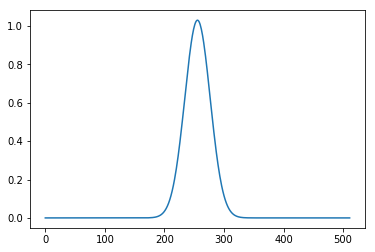

In [2]:
def model_I0E_guass(center_angle, N=512):
    mu = 0
    variance = 0.6
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 12*sigma, mu + 12*sigma, 512)
    y = 2*stats.norm.pdf(x, mu, sigma)
    center_pdf = 180 #deg 
    rolling_angle = center_angle - center_pdf #deg
    rolling_angle_neur  = int(rolling_angle*N/360)
    new_I0E = np.roll(y, rolling_angle_neur )
    return np.reshape(np.array(new_I0E), (N,1))


plt.plot(model_I0E_guass(180))

In [12]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [134]:
def model_I0E_flat(center_angle, size_windows=90, n_ramping=50, N=512):
    inf, sup = np.radians(center_angle) - np.radians(size_windows/2), np.radians(center_angle) + np.radians(size_windows/2)
    new_I0E=[]
    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
    for i in theta:
        if i < closest(theta, inf):
            new_I0E.append(0)
        elif i>= closest(theta, inf) and i <=closest(theta, sup):
            new_I0E.append(1)
        else:
            new_I0E.append(0)
    
    return np.reshape(np.array(new_I0E), (N,1))



def model_I0E_flat(center_angle, size_windows=90, n_ramping=50, N=512):
    inf, sup = np.radians(center_angle) - np.radians(size_windows/2), np.radians(center_angle) + np.radians(size_windows/2)
    inf_r, sup_r = inf  - np.radians(n_ramping), sup  + np.radians(n_ramping)
    #print(inf,sup)
    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
    len_ramping = np.where(np.array(theta) == closest(theta, inf))[0][0] - np.where(np.array(theta) == closest(theta, inf_r))[0][0]
    line = np.linspace(0, 1, len_ramping)
    new_I0E=[]
    a=-1
    for i in theta:
        if i < closest(theta, inf_r):
            new_I0E.append(0)
        elif i>= closest(theta, inf_r) and i <closest(theta, inf):
            a=a+1
            new_I0E.append(line[a])
            #print(a)
        elif i>= closest(theta, inf) and i <=closest(theta, sup):
            new_I0E.append(1)
            a=0
        elif i>= closest(theta, sup) and i <closest(theta, sup_r):
            a=a-1
            new_I0E.append(line[a])
            
        elif i>=closest(theta, sup_r):
            new_I0E.append(0)
    
    return np.reshape(np.array(new_I0E), (N,1))

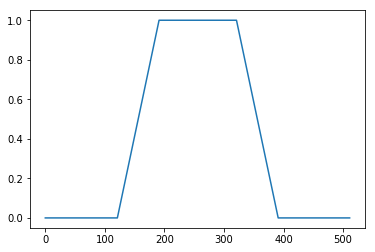

In [135]:
plt.plot(model_I0E_flat(180))

In [9]:
def simulation_m_b(totalTime, targ_onset, dist_onset, presentation_period, separation, inhib_curr, 
               time_ex_input=10, tauE=60, tauI=10, tauf=7000, taud=80, I0E=1.3, I0I=0.4, U=0.4,
               GEE=0.016, GEI=0.015, GIE=0.012 , GII=0.007, sigE=0.06, sigI=0.04,
               kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=20,
               N=512, plot_connectivity=True, plot_dyniamic=True, plot_heatmap=True, plot_fit=True ):
    
    ###### temporal and spatial settings
    st_sim =time.time()
    dt=2;
    nsteps=int(floor(totalTime/dt));
    origin = pi;
    targ_offset = targ_onset + presentation_period;
    targon = floor(targ_onset/dt);
    targoff = floor(targ_offset/dt);
    
    dist_offset = dist_onset  + presentation_period;
    diston = floor(dist_onset/dt);
    distoff = floor(dist_offset/dt);
    stim_sep = pi/separation; #(13 attract, 9 solo 1, 5 repulsion, 2 nada)
    
    targ_dist_delay = dist_onset - targ_offset
    I0E = 1
    I0E_standard = 0.9 #I0E
    I0E_open =  1.2 #I0E_standard + 0.5
    I0E_close= 0.6 #I0E_standard -0.35
    if inhib_curr == True: 
        I0E = I0E_close    
    
    ###### Connectivitiess
    v_E=np.zeros((N));
    v_I=np.zeros((N));
    WE=np.zeros((N,N));
    WI=np.zeros((N,N));
    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
    for i in range(0, N):
        v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
        v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) + k_inhib for f in range(0, len(theta))] #0.18
        ###    
        vE_NEW=np.roll(v_E_new,i)
        vI_NEW=np.roll(v_I_new,i) #to roll
        ###    
        WE[:,i]=vE_NEW
        WI[:,i]=vI_NEW
    
    #
    # Plot of the connectivity profile
    if plot_connectivity ==True:
        plt.figure()
        plt.plot(WE[250, :], label='E')
        plt.plot(WI[250, :], label = 'I')
        plt.ylim(0,6)
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.title('Connectivity WE & WI')
        plt.show(block=False)
        plt.figure()
        plt.plot(WE[250, :] - WI[250, :] , label='E-I')
        #plt.plot(WI[250, :], label = 'I')
        #plt.ylim(0,6)
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.title('Effective onnectivity')
        plt.show(block=False)
    
    #topography_pattern  =  WE[250, :] + -1*(WI[250, :]) ##plot the topography of the connectivities
    #plt.plot(topography_pattern, 'k')
    #plt.show(block=False)
    
    ###### Stimuli
    target=np.zeros((N))
    distractor=np.zeros((N))
    for i in range(0, N):
        target[i]=e**(kappa_stim*cos(theta[i] + origin - stim_sep))  / (2*pi*scipy.special.i0(kappa_stim)) ## target at (origin + sep)
        distractor[i]=e**(kappa_stim*cos(theta[i] + origin + stim_sep)) / (2*pi*scipy.special.i0(kappa_stim)) ## distractor at (origin -sep)
    
    
    #
    target = target+ np.random.normal(0, 0.01, N)
    target=reshape(target, (N,1))
    distractor = distractor+ np.random.normal(0, 0.01, N)
    distractor=reshape(distractor, (N,1)) 
    
    #plt.plot(target) ##plot the target and distractor
    #plt.plot(distractor)
    #plt.show(block=False)
    
    ###### Model   
    rE=np.zeros((N,1));
    rI=np.zeros((N,1)); 
    u = np.ones((N,1))*U
    x = np.ones((N,1))
    RE=np.zeros((N,nsteps));
    RI=np.zeros((N,nsteps));
    p_u=np.ones((N,nsteps));
    p_x=np.ones((N,nsteps));
    
    f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)
    
    
    #quadrant_selectivity = ones((N,1))
    
    #### Different quadrant_selectivity options
    start_q_se = model_I0E( np.degrees(origin + stim_sep),90)
    f1 = np.where(start_q_se==0, I0E_close, start_q_se)
    quadrant_selectivity_open = np.where(f1==1, I0E_standard, f1)
    ##
    start_q_se = model_I0E( np.degrees(origin + stim_sep),90)
    f1 = np.where(start_q_se==0, I0E_close, start_q_se)
    quadrant_selectivity_close = np.where(f1==1, I0E_close, f1)    
    ###  
    quadrant_selectivity_standard = I0E_standard * ones((N,1))
    quadrant_selectivity = quadrant_selectivity_standard
    
    
    #### Different quadrant_selectivity options gaussian
    quadrant_selectivity_close = model_I0E_constant(I0E_close)
    #quadrant_selectivity_open = model_I0E_guass( np.degrees(origin + stim_sep))*(I0E_open-I0E_close) + I0E_close
    quadrant_selectivity_open = model_I0E_flat( np.degrees(origin + stim_sep))*(I0E_open-I0E_close) + I0E_close
    quadrant_selectivity_standard = model_I0E_constant(I0E_standard)
    quadrant_selectivity = quadrant_selectivity_standard
    
    ### diferential equations
    for i in range(0, nsteps):
        noiseE = sigE*random.randn(N,1);
        noiseI = sigI*random.randn(N,1);

        #differential equations for connectivity
        #IE= GEE*dot(WE, (rE*u*x)) - GIE*dot(WI,rI) + I0E* ones((N,1)); 
        IE= GEE*dot(WE, (rE*u*x)) - GIE*dot(WI,rI) + quadrant_selectivity;
        II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));

        if i>targon and i<targoff:
            IE=IE+target;
            II=II+target;

        if i>diston and i<distoff:
            IE=IE+distractor;
            II=II+distractor;
        
        if inhib_curr == True: ### order 2
            if i< targon:
                #I0E=I0E_close
                quadrant_selectivity = quadrant_selectivity_close
            ###
            ### General
            ###
            if i > targon and i < targoff:
                #I0E=I0E_open
                quadrant_selectivity = quadrant_selectivity_open

            if i > targoff:
                #I0E = I0E_standard
                quadrant_selectivity = quadrant_selectivity_open
            ####
        #####
        elif inhib_curr == False: ### order 1
            if i< targon:
                quadrant_selectivity = quadrant_selectivity_standard
            ### General
            ###
            if i > targon and i < targoff:
                #I0E=I0E_open
                quadrant_selectivity = quadrant_selectivity_open

            if i > targoff:
                #I0E = I0E_open
                quadrant_selectivity = quadrant_selectivity_open
            ####
        #####################################################
        #####################################################
        #rates of exit and inhib   
        rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
        rI = rI + (f(II) - rI + noiseI)*dt/tauI;
        ### formulas for synaptic plasticity: paper mongillo 2008
        u = u + ((U - u) / tauf + U*(1-u)*rE/1000)*dt;
        x = x + ((1 - x)/taud - u*x*rE/1000)*dt;
        
        rEr=np.reshape(rE, N)
        rIr=np.reshape(rI, N)
        ur=np.reshape(u, N)
        xr=np.reshape(x, N)
        #append
        RE[:,i] = rEr;
        RI[:,i] = rIr;
        p_u[:,i] = ur;
        p_x[:,i] = xr;
    
    
    #### Interference
    interference = Interference_effects( [decode_rE(target)], [decode_rE(rE)], [decode_rE(distractor)])[0]
    p_targ = int((N * np.degrees(origin + stim_sep))/360)
    if plot_dyniamic==True:
        #### plot dynamics
        fig = plt.figure()
        fig.tight_layout()
        fig.set_size_inches(13, 4)
        fig.add_subplot(131)
        p_targ = int((N * np.degrees(origin + stim_sep))/360)
        plt.title('Synaptic dynamics for target')
        plt.plot(p_u[p_targ, :], 'b', label='prob. release')
        plt.plot(p_x[p_targ, :], 'r', label='pool vesicles')
        plt.xlabel('time (ms)')
        plt.legend()
        fig.add_subplot(132)
        p_dist= int((N * np.degrees(origin - stim_sep))/360)
        plt.title('Synaptic dynamics for distractor')
        plt.plot(p_u[p_dist, :], 'b', label='prob.y release')
        plt.plot(p_x[p_dist, :], 'r', label='pool vesicles')
        plt.xlabel('time (ms)')
        plt.legend()
        fig.add_subplot(133)
        plt.title('Rate dynamics')
        plt.plot(RE[p_targ, :], 'b', label='target')
        plt.plot(RE[p_dist, :], 'r', label='distractor')
        plt.xlabel('time (ms)')
        plt.ylabel('rate (Hz)')
        plt.legend()
        plt.show(block=False)
    #
    if plot_heatmap==True:
        #### plot heatmap
        p_dist= int((N * np.degrees(origin - stim_sep))/360)
        plt.figure(figsize=(9,6))
        sns.heatmap(RE, cmap='viridis')
        plt.title('BUMP activity')
        plt.ylabel('Angle')
        plt.xlabel('time')
        plt.plot([targon, nsteps], [p_targ, p_targ], '--b',) ## flipped, so it is p_target 
        plt.plot([diston, nsteps], [p_dist, p_dist], '--r',) ## flipped, so it is p_target 
        plt.yticks([])
        plt.xticks([])
        plt.yticks([N/8, 3*N/8, 5*N/8, 7*N/8 ] ,['45','135','225', '315'])
        plt.plot([targ_onset/2, targ_onset/2,], [0+20, N-20], 'k-', label='onset')
        plt.plot([targ_offset/2, targ_offset/2,], [0+20, N-20], 'k--', label='offset')
        plt.plot([dist_onset/2, dist_onset/2,], [0+20, N-20], 'k-')
        plt.plot([dist_offset/2, dist_offset/2,], [0+20, N-20], 'k--')
        plt.legend()
        plt.show(block=False)
    
    
    ## print time consumed
    end_sim =time.time()
    total_time= end_sim - st_sim 
    total_time = round(total_time, 1)
    print('Simulation time: ' + str(total_time) + 's')
    
    #### Fit
    ###### Fit
    def von_misses(x,mu,k):
        return (exp( k * cos(x-mu))) / (2*pi*scipy.special.i0(k)) 

    def bi_von_misses(x,mu1,k1,mu2,k2):
        return von_misses(x,mu1,k1) + von_misses(x,mu2,k2)
    
    def gauss(x,mu,sigma,A):
        return A*exp(-(x-mu)**2/2/sigma**2)

    ##
    y=np.reshape(rE, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)

    ### Fit
    df_n_p=pd.DataFrame()
    df_n_p['rE'] = rE.reshape(512)
    peaks_list=[]
    for n_w_s in range(1, 100):
        r = df_n_p['rE'].rolling(window=n_w_s).mean()
        number_of_bumps = len(scipy.signal.find_peaks(r, 2)[0]) 
        peaks_list.append(number_of_bumps)
    #
    if number_of_bumps == 0:
        if peaks_list==[0 for i in range(len(peaks_list))]:
            number_of_bumps = 0
        else:
            peaks_list[:] = (value for value in peaks_list if value != 0)
            number_of_bumps=most_frequent(peaks_list)
    #
    number_of_bumps=most_frequent(peaks_list)
    #print(number_of_bumps)
    #number_of_bumps = 2
    ### Fit
    ### Fit
    if number_of_bumps ==2:
        target_pos_pi_pi = decode_rE(target) * 2*pi / 360 -pi
        distractor_pos_pi_pi = decode_rE(distractor) * 2*pi / 360 -pi
        param, covs = curve_fit(bi_von_misses, X, y, p0=[target_pos_pi_pi + pi, -36,  distractor_pos_pi_pi - pi, -36]) #p0=[separation, 75, -separation, 75]
        ans = (exp( param[1] * cos(X-param[0]))) / (2*pi*scipy.special.i0(param[1])) + (exp( param[3] * cos(X-param[2]))) / (2*pi*scipy.special.i0(param[3])) 
        estimated_angles=[]
        for p in [param[0], param[2]]:
            estim_ang = np.degrees(p)
            if estim_ang<0:
                estim_ang = 360+estim_ang
            estimated_angles.append(estim_ang)
        
        #
        #print(estimated_angles)
        #decoded angles
        decoded_target = closest(estimated_angles, decode_rE(target))
        decoded_distractor = closest(estimated_angles, decode_rE(distractor))
        #bias
        bias_target = Interference_effects(  [decode_rE(target)],  [decoded_target],  [decode_rE(distractor)])[0]
        bias_dist = Interference_effects(  [decode_rE(distractor)],  [decoded_distractor],  [decode_rE(target)])[0]
        final_bias = [bias_target, bias_dist]
        skip_r_sq=False
        success=True
        #print(np.degrees( origin - pi/separation), decode_rE(target))
        #print(np.degrees( origin + pi/separation), decode_rE(distractor))
        #print(targ_ang, dist_ang)


    elif number_of_bumps ==1:
        target_pos_pi_pi = decode_rE(target) * 2*pi / 360 -pi
        distractor_pos_pi_pi = decode_rE(distractor) * 2*pi / 360 -pi
        #param, covs = curve_fit(bi_von_misses, X, y, p0=[target_pos_pi_pi + pi, -36,  distractor_pos_pi_pi - pi, -36]) #p0=[separation, 75, -separation, 75]
        #ans = (exp( param[1] * cos(X-param[0]))) / (2*pi*scipy.special.i0(param[1])) + (exp( param[3] * cos(X-param[2]))) / (2*pi*scipy.special.i0(param[3])) 
        param, covs = curve_fit(gauss, X, y) #p0=[separation, 75, -separation, 75]
        ans = param[2]*exp(-(X-param[0])**2/2/param[1]**2)      #(exp( param[1] * cos(X-param[0]))) / (2*pi*scipy.special.i0(param[1]))  
        estimated_angles=[]
        for p in [param[0]]: #, param[2]]:
            estim_ang = np.degrees(p) + 180
            if estim_ang<0:
                estim_ang = 360+estim_ang
            estimated_angles.append(estim_ang)
        
        decoded_target = closest(estimated_angles, decode_rE(target))
        print('Resp: ' + str(decoded_target ) )
        print('Targ: ' + str(decode_rE(target)) )
        print('Dist: ' + str(decode_rE(distractor) ) )
        bias_target = Interference_effects(  [decode_rE(target)],  [decoded_target],  [decode_rE(distractor)])[0]
        bias_dist = 0
        skip_r_sq=False
        success=True

    else:
        print('Error simultaion')
        bias_target =999
        bias_dist =999
        final_bias=[999, 999]
        plot_fit=False
        skip_r_sq=True
        r_squared=0
        success=False ## to eliminate wrong simulations easily at the end

    #error_fit (r_squared)
    if skip_r_sq==False:
        residuals = y - ans
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y-numpy.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

    #plot fit
    if plot_fit==True:
        plt.figure()
        plt.plot(X, y, 'o', color ='red', label ="data") 
        plt.plot(X, ans, '--', color ='blue', label ="fit") 
        plt.legend() 
        plt.show(block=False) 
    
    ### Output
    #return RE,  RI, p_u, p_x
    #return interference, targ_dist_delay 
    max_re = max(rE)[0]
    ### interfernce max
    #dec_far = np.linspace(180,0,int(N/2))[np.where(y[int(N/2):]==max(y[int(N/2):]))[0][0]]
    #dec_close = np.linspace(180,0,int(N/2))[np.where(y1[int(N/2):]==max(y1[int(N/2):]))[0][0]]
    #int_close = dec_close - np.degrees( pi - pi/4)
    #int_far = dec_far - np.degrees( pi - pi/4)
    angle_separation = round(2*np.degrees(pi/separation),2)
    
    return bias_target, bias_dist, number_of_bumps, angle_separation #rE[p_targ][0], I0E

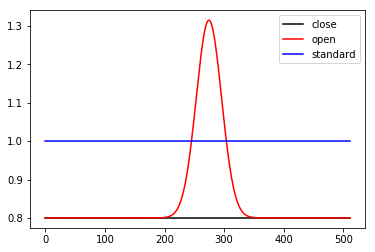

In [4]:
### Plot the different quadrant selectuivity
origin=pi
stim_sep=pi/13
I0E_standard=1
I0E_close = 0.8
I0E_open=1.3

quadrant_selectivity_close = model_I0E_constant(I0E_close)
quadrant_selectivity_standard = model_I0E_constant(I0E_standard)
quadrant_selectivity_open = model_I0E_guass( np.degrees(origin + stim_sep))*(I0E_open-I0E_close) + I0E_close


plt.plot(quadrant_selectivity_close, 'k', label='close')
plt.plot(quadrant_selectivity_open, 'r', label='open')
plt.plot(quadrant_selectivity_standard, 'b', label='standard')
plt.legend()
plt.show()

    

Examples of all conditions

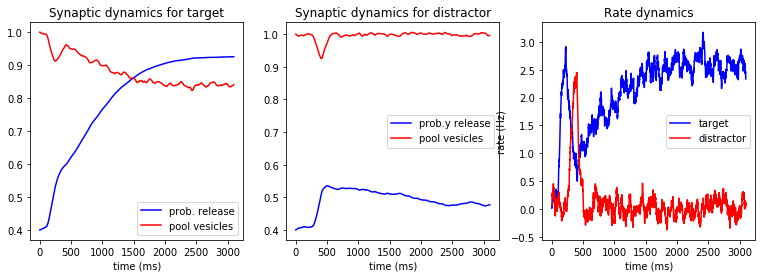

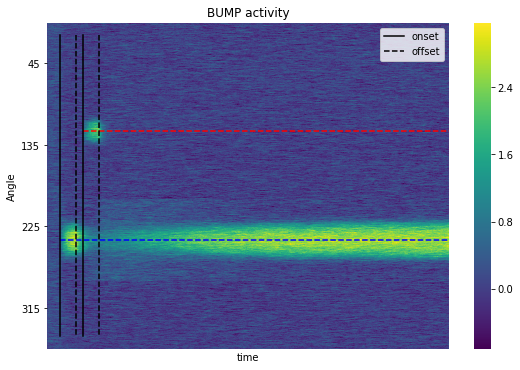

Simulation time: 32.6s
Resp: 241.00497349067376
Targ: 240.44684411896316
Dist: 120.15824596819967


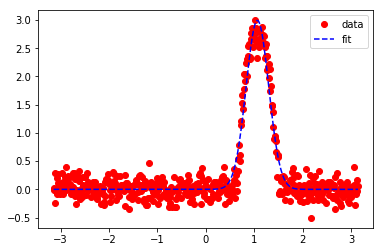

-0.56 0 120.0


In [11]:
### 1_0.2 far
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=550, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=1.2,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

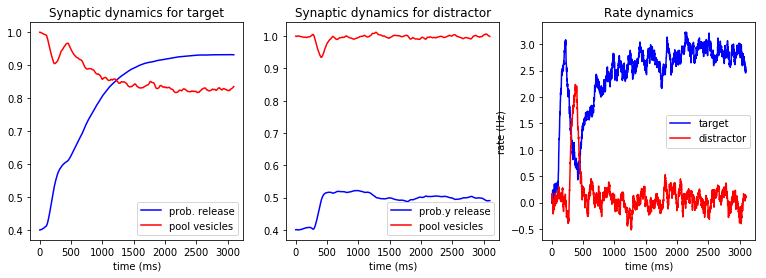

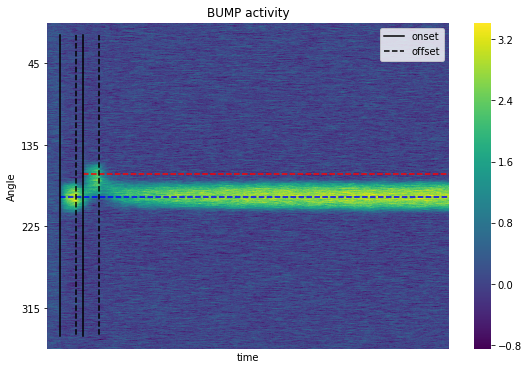

Simulation time: 33.9s
Resp: 192.27890482171887
Targ: 193.22057023515248
Dist: 167.53132092620712


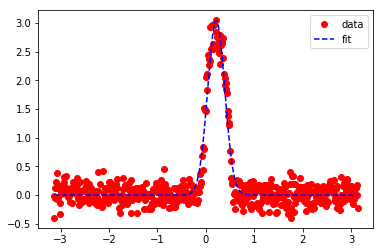

0.94 0 25.71


In [83]:
### 1_0.2 close
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=550, 
                                                          presentation_period=250,
                                                          separation=14, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=1.2,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

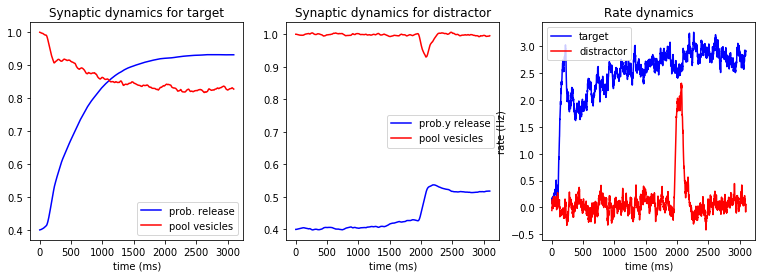

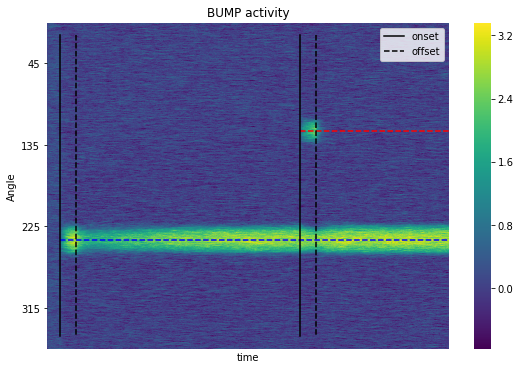

Simulation time: 30.7s
Resp: 239.67093228461044
Targ: 240.53655907646822
Dist: 120.0283322831305


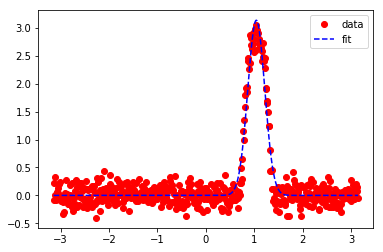

0.87 0 120.0


In [84]:
### 1_7 far
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=3900, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=1.2,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

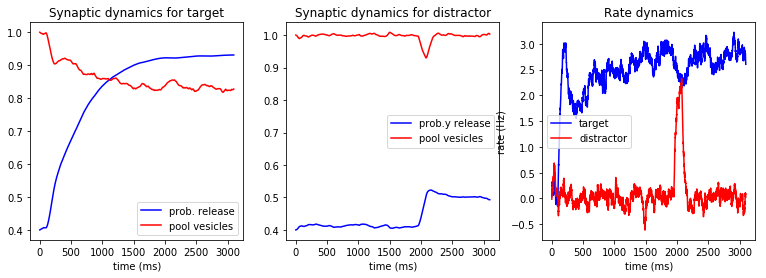

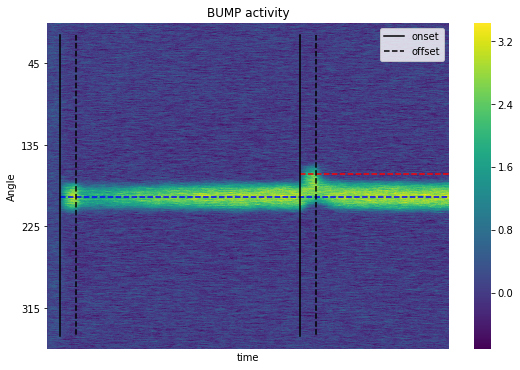

Simulation time: 34.7s
Resp: 192.21562538132326
Targ: 193.24763374824323
Dist: 167.3205387759324


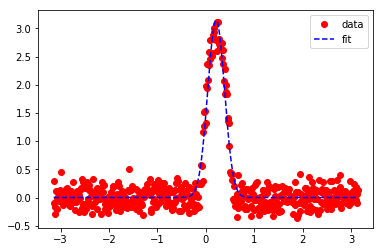

1.03 0 25.71


In [85]:
### 1_7 close
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=3900, 
                                                          presentation_period=250,
                                                          separation=14, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=1.2,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

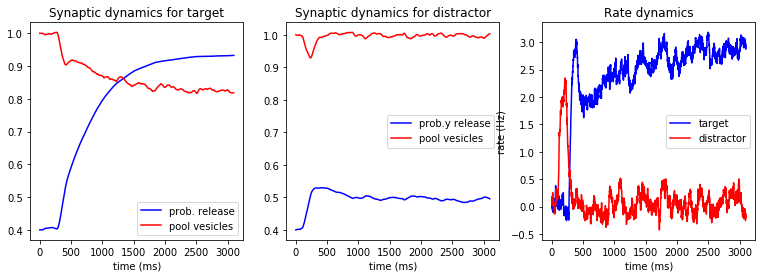

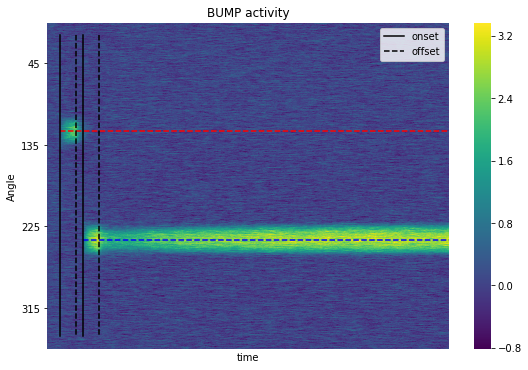

Simulation time: 31.3s
Resp: 239.67171008311337
Targ: 240.50468148498442
Dist: 120.10926776647023


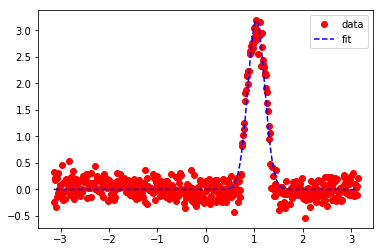

0.83 0 120.0


In [86]:
#2_02 far
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200,
                                                          targ_onset = 550,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=1.2, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

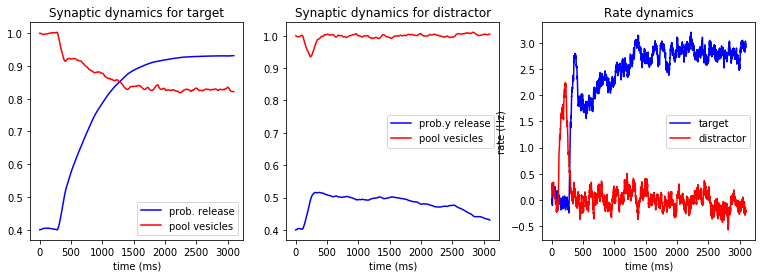

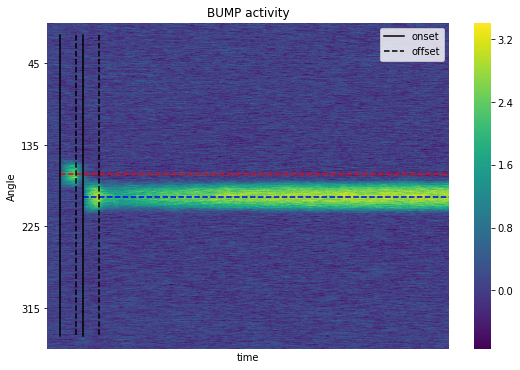

Simulation time: 30.7s
Resp: 191.89387587098622
Targ: 193.522976942591
Dist: 167.53599007250807


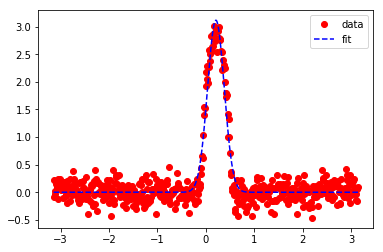

1.63 0 25.71


In [87]:
#2_02 close
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200,
                                                          targ_onset = 550,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=14, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=1.2, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

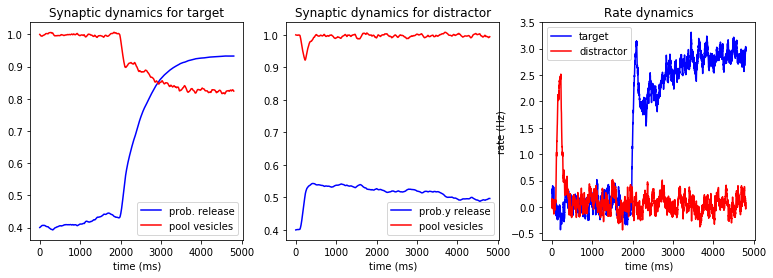

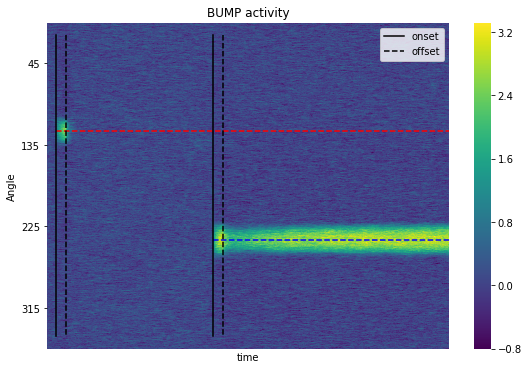

Simulation time: 47.1s
Resp: 239.85067590355564
Targ: 240.42866690449875
Dist: 120.31869508043603


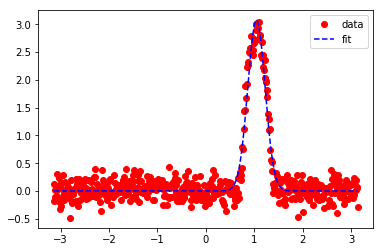

0.58 0 120.0


In [88]:
## 2_7 far
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=9600,
                                                          targ_onset = 3950,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=1.2, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

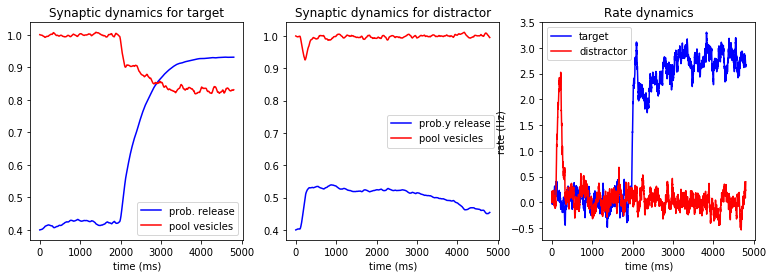

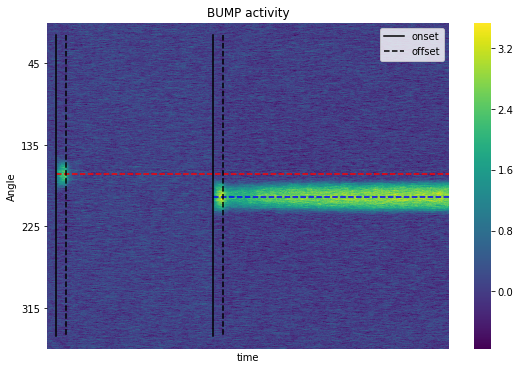

Simulation time: 45.6s
Resp: 192.87657336005933
Targ: 193.38898120309173
Dist: 167.55357498111695


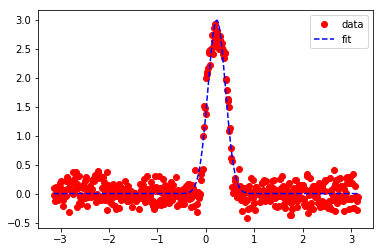

0.51 0 25.71


In [89]:
## 2_7 close
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=9600,
                                                          targ_onset = 3950,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=14, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=1.2, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

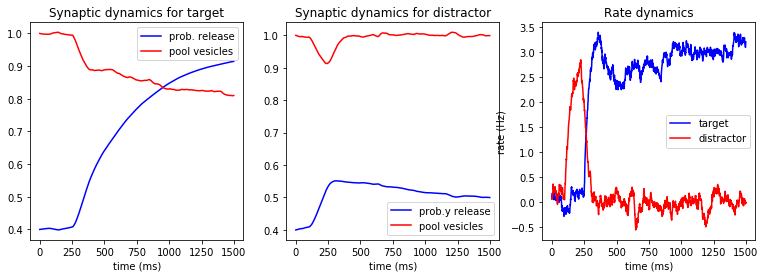

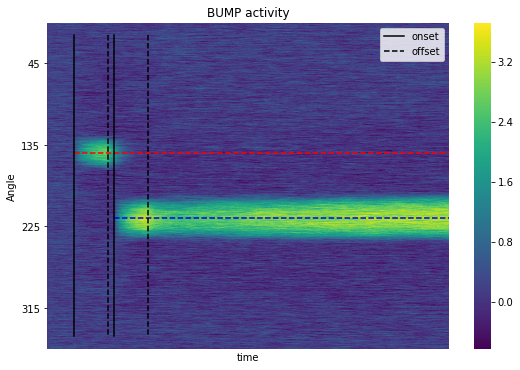

Simulation time: 34.3s
Resp: 215.9980093651993
Targ: 216.407750468566
Dist: 144.18914826633483


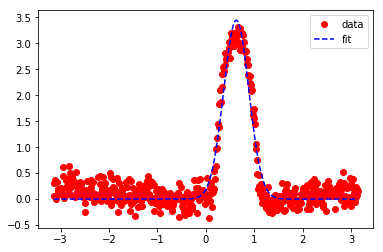

0.41 1 72.0


In [23]:
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=3000, 
                                                          targ_onset = 500,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=1.2,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, number_of_bumps, angle_separation)

In [118]:

N=512
kappa_E=100
kappa_I=1.5
k_inhib=0.07


###### Connectivitiess
v_E=np.zeros((N));
v_I=np.zeros((N));
WE=np.zeros((N,N));
WI=np.zeros((N,N));
theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
for i in range(0, N):
    v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
    v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) + k_inhib for f in range(0, len(theta))] #0.18
    ###    
    vE_NEW=np.roll(v_E_new,i)
    vI_NEW=np.roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW

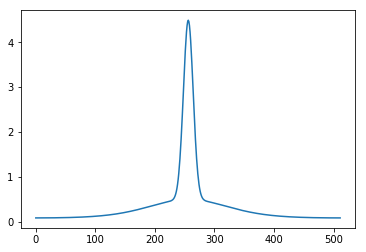

In [123]:
plt.plot(WE[:, int(512/2)] +WI[:, int(512/2)])

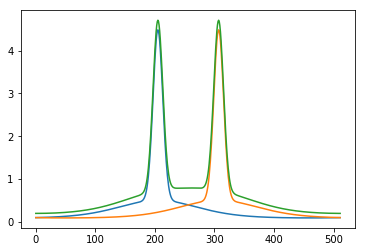

In [153]:
sep=5

targ=int(512/2) -  int(((pi/sep) / (2*pi)) *512)
dist =int(512/2) +  int(((pi/sep) / (2*pi)) *512)

plt.plot(WE[:, targ] +WI[:, targ])
plt.plot(WE[:, dist] +WI[:, dist])


plt.plot(WE[:, targ] +WI[:, targ] + WE[:, dist] +WI[:, dist])

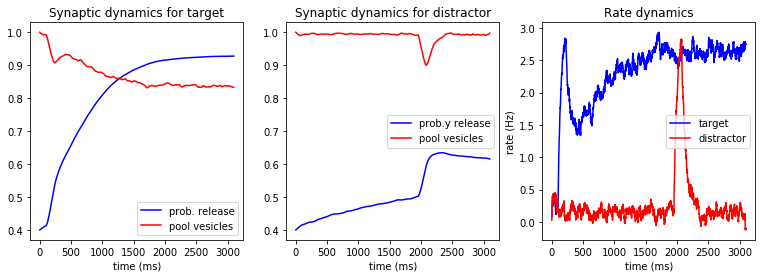

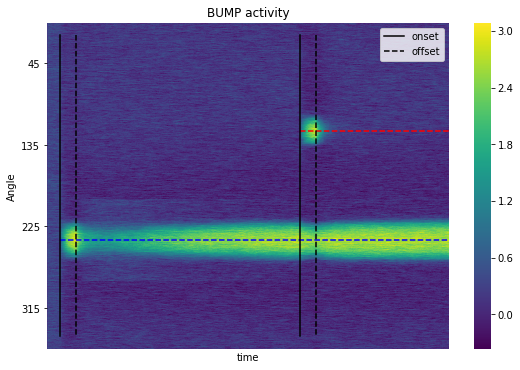

Simulation time: 32.9s


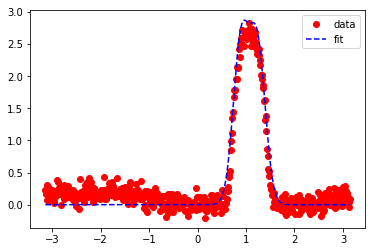

9.29 0 120.0


In [86]:
### 1_7 far
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=3900, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=0.7,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

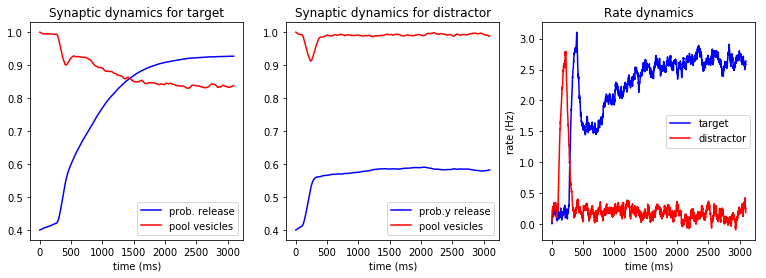

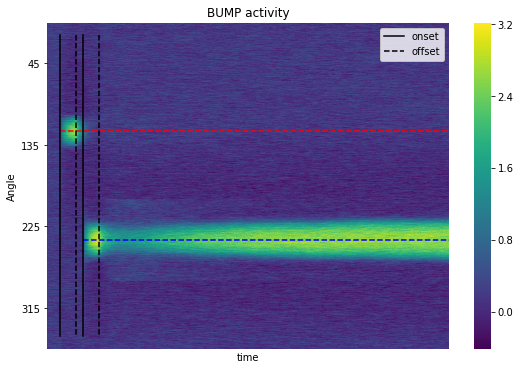

Simulation time: 33.7s


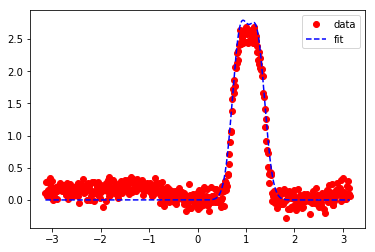

10.32 0 120.0


In [87]:
### 2_02 far
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200,
                                                          targ_onset = 550,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

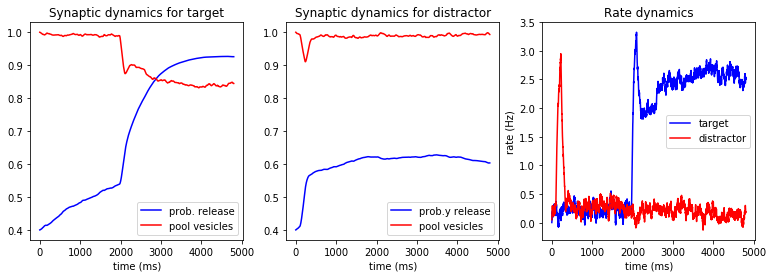

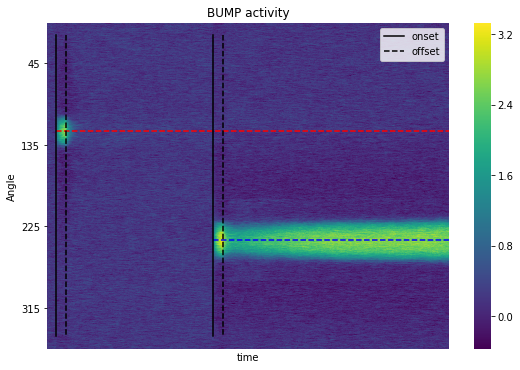

Simulation time: 54.0s


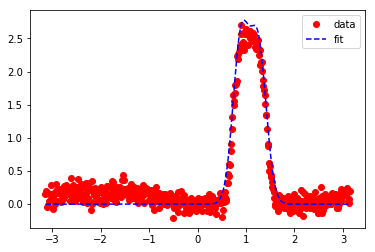

9.33 0 120.0


In [88]:
### 2_7 (far)

bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=9600,
                                                          targ_onset = 3950,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=3, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

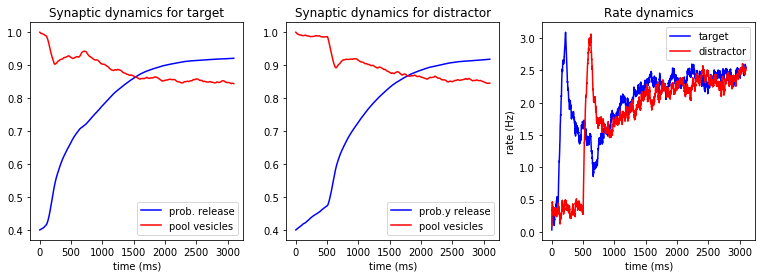

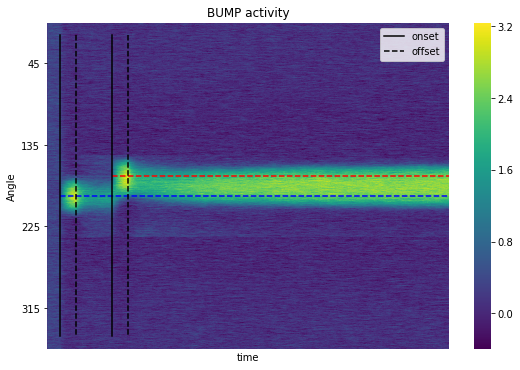

Simulation time: 36.5s


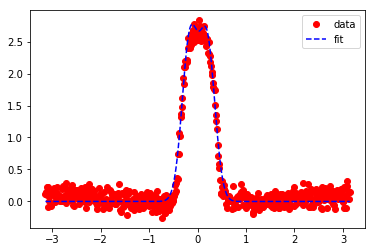

0.32 1.72 22.5


In [50]:
####

bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=1000, 
                                                          presentation_period=250,
                                                          separation=16, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=0.7,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

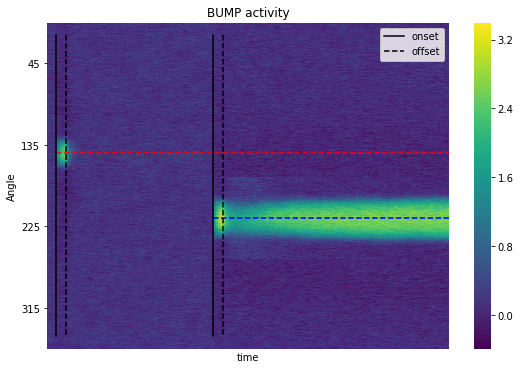

Simulation time: 53.1s


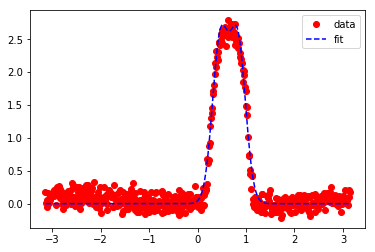

9.89 62.47 72.0


In [54]:
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=9600,
                                                          targ_onset = 3950,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=False, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

In [ ]:
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200,
                                                          targ_onset = 550,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=False, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

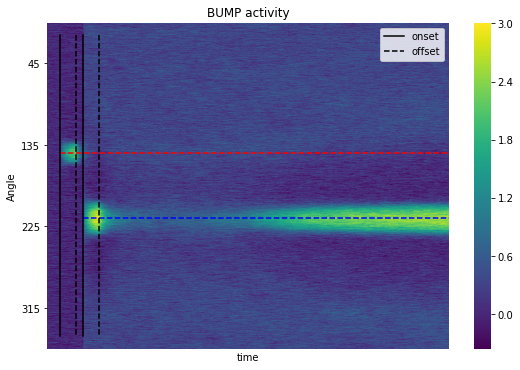

Simulation time: 66.6s


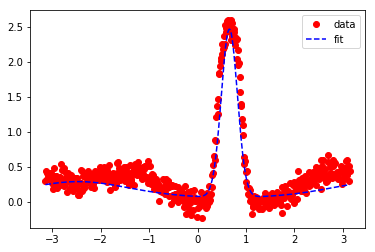

-1.2 73.4 72.0


In [28]:
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200,
                                                          targ_onset = 550,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=False, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

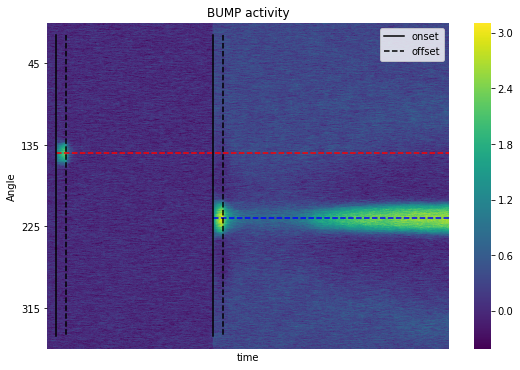

Simulation time: 100.7s


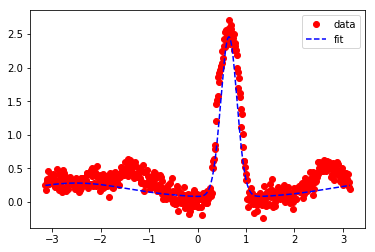

0.07 71.99 72.0


In [29]:
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=9600,
                                                          targ_onset = 3950,
                                                          dist_onset=200, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=True, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=False, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

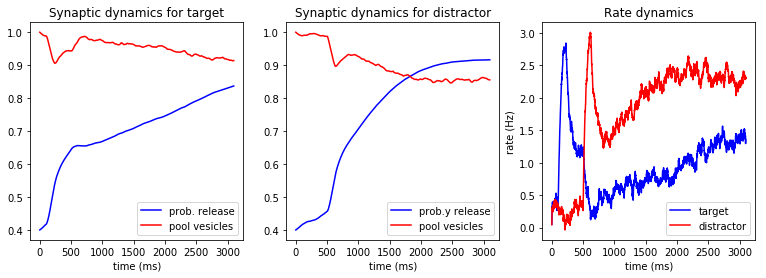

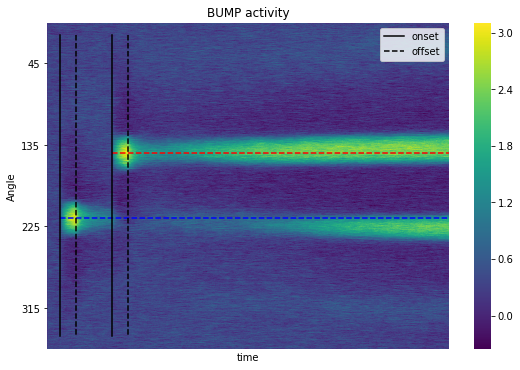

Simulation time: 69.0s


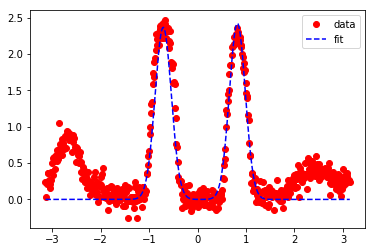

-10.73 -5.12 72.0


In [30]:
bias_target, bias_dist, number_of_bumps, angle_separation  = simulation_m_b(totalTime=6200, 
                                                          targ_onset = 200,
                                                          dist_onset=1000, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=0.7,
                                                          GEE=0.016,
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=True, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)

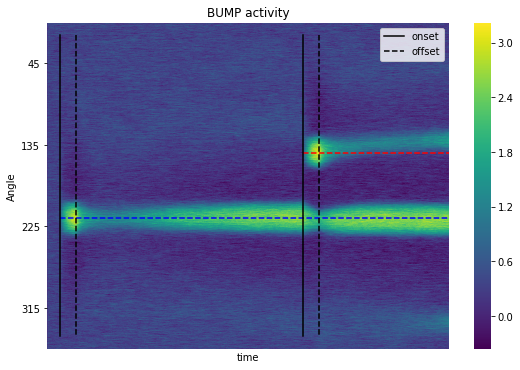

Simulation time: 65.3s


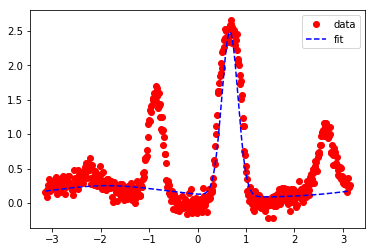

-1.67 -71.17 72.0


In [31]:
bias_target, bias_dist, number_of_bumps, angle_separation = simulation_m_b(totalTime=6200,
                                                          targ_onset = 200,
                                                          dist_onset=450+3500, 
                                                          presentation_period=250,
                                                          separation=5, 
                                                          inhib_curr=False, 
                                                          time_ex_input=0, 
                                                          sigE=0.7, 
                                                          plot_connectivity=False, 
                                                          plot_dyniamic=False, 
                                                          plot_heatmap=True, 
                                                          plot_fit=True )
print(bias_target, bias_dist, angle_separation)